# Heart Disease Prediction

- Hannah Dickescheid (50178)
- Julia Stieler (56040)
- Eva Zinser (53100)
- Carlos Ferrufino (53276)
- Celina Kollwitz (53676)

Heart disease is one of the leading causes of death worldwide, and early detection can be critical for successful treatment. Machine learning has emerged as a powerful tool for predicting the risk of heart disease by analyzing various features such as age, gender, blood pressure, cholesterol level, and smoking habits. In this notebook, we will explore a heart disease dataset and build a machine learning model to predict the likelihood of heart disease based on various patient features.

**_STATE** State FIPS Code\
**FMONTH** File Month\
**IDATE** Interview Date\
**IMONTH** Interview Month\
**IDAY** Interview Day\
**IYEAR** Interview Year\
**DISPCODE** Final Disposition\
**SEQNO** Annual Sequence Number\
**_PSU** Primary Sampling Unit (Equal to Annual Sequence Number)\
**CTELENUM** Correct Telephone Number\
**PVTRESD1** Is it a private residence?\
**COLGHOUS** Do you live in a college housing?\
**STATERES** Do you reside in (state)?
**CELLFON3**  Is this a cellular telephone? (Telephone service over the internet counts as landline service (includes Vonage, Magic 
Jack and other home-based phone services)\
**LADULT** Are you 18 years of age or older?\
**NUMADULT** Number of Adults in Household\
**NUMMEN** Number of Adult Men in Household\
**NUMWOMEN** Number of Adult Women in Household\
**CTELNUM1**  Is this (phone number) ?\
**CELLFON2** Is this a cellular telephone?\
**CADULT** Are you 18 years of age or older\
**PVTRESD2** Do you live in a private residence, that is, not in a dormitory or other type of group living situation?\
**CCLGHOUS**  Do you live in college housing?\



In [2]:
import os
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score

In [3]:
data_df = pd.read_csv("data/2015.csv")
data_df.head()

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENUM,...,_PAREC1,_PASTAE1,_LMTACT1,_LMTWRK1,_LMTSCL1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3
0,1.0,1.0,b'01292015',b'01',b'29',b'2015',1200.0,2.015000e+09,2.015000e+09,1.0,...,4.0,2.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,1.0
1,1.0,1.0,b'01202015',b'01',b'20',b'2015',1100.0,2.015000e+09,2.015000e+09,1.0,...,2.0,2.0,3.0,3.0,4.0,2.0,2.0,NaN,NaN,2.0
2,1.0,1.0,b'02012015',b'02',b'01',b'2015',1200.0,2.015000e+09,2.015000e+09,1.0,...,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,NaN
3,1.0,1.0,b'01142015',b'01',b'14',b'2015',1100.0,2.015000e+09,2.015000e+09,1.0,...,4.0,2.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,9.0
4,1.0,1.0,b'01142015',b'01',b'14',b'2015',1100.0,2.015000e+09,2.015000e+09,1.0,...,4.0,2.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,1.0


In [4]:
data_df.shape

(441456, 330)

In [5]:
data_df.columns

Index(['_STATE', 'FMONTH', 'IDATE', 'IMONTH', 'IDAY', 'IYEAR', 'DISPCODE',
       'SEQNO', '_PSU', 'CTELENUM',
       ...
       '_PAREC1', '_PASTAE1', '_LMTACT1', '_LMTWRK1', '_LMTSCL1', '_RFSEAT2',
       '_RFSEAT3', '_FLSHOT6', '_PNEUMO2', '_AIDTST3'],
      dtype='object', length=330)

In [6]:
columns = list(data_df)
columns

['_STATE',
 'FMONTH',
 'IDATE',
 'IMONTH',
 'IDAY',
 'IYEAR',
 'DISPCODE',
 'SEQNO',
 '_PSU',
 'CTELENUM',
 'PVTRESD1',
 'COLGHOUS',
 'STATERES',
 'CELLFON3',
 'LADULT',
 'NUMADULT',
 'NUMMEN',
 'NUMWOMEN',
 'CTELNUM1',
 'CELLFON2',
 'CADULT',
 'PVTRESD2',
 'CCLGHOUS',
 'CSTATE',
 'LANDLINE',
 'HHADULT',
 'GENHLTH',
 'PHYSHLTH',
 'MENTHLTH',
 'POORHLTH',
 'HLTHPLN1',
 'PERSDOC2',
 'MEDCOST',
 'CHECKUP1',
 'BPHIGH4',
 'BPMEDS',
 'BLOODCHO',
 'CHOLCHK',
 'TOLDHI2',
 'CVDINFR4',
 'CVDCRHD4',
 'CVDSTRK3',
 'ASTHMA3',
 'ASTHNOW',
 'CHCSCNCR',
 'CHCOCNCR',
 'CHCCOPD1',
 'HAVARTH3',
 'ADDEPEV2',
 'CHCKIDNY',
 'DIABETE3',
 'DIABAGE2',
 'SEX',
 'MARITAL',
 'EDUCA',
 'RENTHOM1',
 'NUMHHOL2',
 'NUMPHON2',
 'CPDEMO1',
 'VETERAN3',
 'EMPLOY1',
 'CHILDREN',
 'INCOME2',
 'INTERNET',
 'WEIGHT2',
 'HEIGHT3',
 'PREGNANT',
 'QLACTLM2',
 'USEEQUIP',
 'BLIND',
 'DECIDE',
 'DIFFWALK',
 'DIFFDRES',
 'DIFFALON',
 'SMOKE100',
 'SMOKDAY2',
 'STOPSMK2',
 'LASTSMK2',
 'USENOW3',
 'ALCDAY5',
 'AVEDRNK2',
 'DRNK3GE

In [7]:
missing_values = data_df.isna().sum()
missing_values

_STATE           0
FMONTH           0
IDATE            0
IMONTH           0
IDAY             0
             ...  
_RFSEAT2         0
_RFSEAT3         0
_FLSHOT6    283502
_PNEUMO2    283502
_AIDTST3     43387
Length: 330, dtype: int64

In [8]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 441456 entries, 0 to 441455
Columns: 330 entries, _STATE to _AIDTST3
dtypes: float64(323), object(7)
memory usage: 1.1+ GB


### Selection of the relevant columns
Research regarding heart disease has identified different important risk factors. We chose these from the dataset. 


In [9]:
# select specific columns
data_df_selected = data_df[['IDATE',
                                         '_MICHD', 
                                         '_RFHYPE5',  
                                         'TOLDHI2', '_CHOLCHK', 
                                         '_BMI5', 
                                         'SMOKE100', 
                                         'CVDSTRK3', 'DIABETE3', 
                                         '_TOTINDA', 
                                         '_FRTLT1', '_VEGLT1', 
                                         '_RFDRHV5', 
                                         'HLTHPLN1', 'MEDCOST', 
                                         'GENHLTH', 'MENTHLTH', 'PHYSHLTH', 'DIFFWALK', 
                                         'SEX', '_AGEG5YR', 'EDUCA', 'INCOME2' 
                           ]]

In [10]:
data_df_selected.head()

,IDATE,_MICHD,_RFHYPE5,TOLDHI2,_CHOLCHK,_BMI5,SMOKE100,CVDSTRK3,DIABETE3,_TOTINDA,...,HLTHPLN1,MEDCOST,GENHLTH,MENTHLTH,PHYSHLTH,DIFFWALK,SEX,_AGEG5YR,EDUCA,INCOME2
0,b'01292015',2.0,2.0,1.0,1.0,4018.0,1.0,2.0,3.0,2.0,...,1.0,2.0,5.0,18.0,15.0,1.0,2.0,9.0,4.0,3.0
1,b'01202015',2.0,1.0,2.0,2.0,2509.0,1.0,2.0,3.0,1.0,...,2.0,1.0,3.0,88.0,88.0,2.0,2.0,7.0,6.0,1.0
2,b'02012015',NaN,1.0,1.0,1.0,2204.0,NaN,1.0,3.0,9.0,...,1.0,2.0,4.0,88.0,15.0,NaN,2.0,11.0,4.0,99.0
3,b'01142015',2.0,2.0,1.0,1.0,2819.0,2.0,2.0,3.0,2.0,...,1.0,1.0,5.0,30.0,30.0,1.0,2.0,9.0,4.0,8.0
4,b'01142015',2.0,1.0,2.0,1.0,2437.0,2.0,2.0,3.0,2.0,...,1.0,2.0,5.0,88.0,20.0,2.0,2.0,9.0,5.0,77.0


In [11]:
# drop missing values
data_df_selected = data_df_selected.dropna()
data_df_selected.shape

(343606, 23)

In [12]:
#Rename the columns to make them more readable
data_df_selected = data_df_selected.rename(columns = {'_MICHD':'HeartDiseaseorAttack', 
                                         '_RFHYPE5':'HighBP',  
                                         'TOLDHI2':'HighChol', '_CHOLCHK':'CholCheck', 
                                         '_BMI5':'BMI', 
                                         'SMOKE100':'Smoker', 
                                         'CVDSTRK3':'Stroke', 'DIABETE3':'Diabetes', 
                                         '_TOTINDA':'PhysActivity', 
                                         '_FRTLT1':'Fruits', '_VEGLT1':"Vegetables", 
                                         '_RFDRHV5':'HvyAlcoholConsump', 
                                         'HLTHPLN1':'AnyHealthcare', 'MEDCOST':'NoDocbcCost', 
                                         'GENHLTH':'GenHlth', 'MENTHLTH':'MentHlth', 'PHYSHLTH':'PhysHlth', 'DIFFWALK':'DiffWalk', 
                                         'SEX':'Sex', '_AGEG5YR':'Age', 'EDUCA':'Education', 'INCOME2':'Income' })

### Process dataset for a machine learning approach

In [13]:
# HeartDiseaseorAttack
#Change 2 to 0 because this means did not have MI or CHD
data_df_selected['HeartDiseaseorAttack'] = data_df_selected['HeartDiseaseorAttack'].replace({2: 0})
data_df_selected.HeartDiseaseorAttack.unique()

array([0., 1.])

In [14]:
#1 HighBP
#Change 1 to 0 so it represetnts No high blood pressure and 2 to 1 so it represents high blood pressure
data_df_selected['HighBP'] = data_df_selected['HighBP'].replace({1:0, 2:1})
data_df_selected = data_df_selected[data_df_selected.HighBP != 9]
data_df_selected.HighBP.unique()

array([1., 0.])

In [15]:
#2 HighChol
# Change 2 to 0 because it is No
# Remove all 7 (dont knows)
# Remove all 9 (refused)
data_df_selected['HighChol'] = data_df_selected['HighChol'].replace({2:0})
data_df_selected = data_df_selected[data_df_selected.HighChol != 7]
data_df_selected = data_df_selected[data_df_selected.HighChol != 9]
data_df_selected.HighChol.unique()

array([1., 0.])

In [16]:
#3 CholCheck
# Change 3 to 0 and 2 to 0 for Not checked cholesterol in past 5 years
# Remove 9
data_df_selected['CholCheck'] = data_df_selected['CholCheck'].replace({3:0,2:0})
data_df_selected = data_df_selected[data_df_selected.CholCheck != 9]
data_df_selected.CholCheck.unique()

array([1., 0.])

In [17]:
#4 BMI (no changes, just note that these are BMI * 100. So for example a BMI of 4018 is really 40.18)
data_df_selected['BMI'] = data_df_selected['BMI'].div(100).round(0)
data_df_selected.BMI.unique()

array([40., 25., 28., 24., 27., 30., 26., 23., 34., 33., 21., 22., 31.,
       38., 20., 19., 32., 46., 41., 37., 36., 29., 35., 18., 54., 45.,
       39., 47., 43., 55., 49., 42., 17., 16., 48., 44., 50., 59., 15.,
       52., 53., 57., 51., 14., 58., 63., 61., 56., 60., 74., 62., 64.,
       13., 66., 73., 65., 68., 85., 71., 84., 67., 70., 82., 79., 92.,
       72., 88., 96., 81., 12., 77., 95., 75., 91., 69., 76., 87., 89.,
       83., 98., 86., 80., 90., 78., 97.])

In [18]:
#5 Smoker
# Change 2 to 0 because it is No
# Remove all 7 (dont knows)
# Remove all 9 (refused)
data_df_selected['Smoker'] = data_df_selected['Smoker'].replace({2:0})
data_df_selected = data_df_selected[data_df_selected.Smoker != 7]
data_df_selected = data_df_selected[data_df_selected.Smoker != 9]
data_df_selected.Smoker.unique()

array([1., 0.])

In [19]:
#6 Stroke
# Change 2 to 0 because it is No
# Remove all 7 (dont knows)
# Remove all 9 (refused)
data_df_selected['Stroke'] = data_df_selected['Stroke'].replace({2:0})
data_df_selected = data_df_selected[data_df_selected.Stroke != 7]
data_df_selected = data_df_selected[data_df_selected.Stroke != 9]
data_df_selected.Stroke.unique()

array([0., 1.])

In [20]:
#7 Diabetes
# going to make this ordinal. 0 is for no diabetes or only during pregnancy, 1 is for pre-diabetes or borderline diabetes, 2 is for yes diabetes
# Remove all 7 (dont knows)
# Remove all 9 (refused)
data_df_selected['Diabetes'] = data_df_selected['Diabetes'].replace({2:0, 3:0, 1:2, 4:1})
data_df_selected = data_df_selected[data_df_selected.Diabetes != 7]
data_df_selected = data_df_selected[data_df_selected.Diabetes != 9]
data_df_selected.Diabetes.unique()

array([0., 2., 1.])

In [21]:
#8 PhysActivity
# 1 for physical activity
# change 2 to 0 for no physical activity
# Remove all 9 (don't know/refused)
data_df_selected['PhysActivity'] = data_df_selected['PhysActivity'].replace({2:0})
data_df_selected = data_df_selected[data_df_selected.PhysActivity != 9]
data_df_selected.PhysActivity.unique()

array([0., 1.])

In [22]:
#9 Fruits
# Change 2 to 0. this means no fruit consumed per day. 1 will mean consumed 1 or more pieces of fruit per day 
# remove all dont knows and missing 9
data_df_selected['Fruits'] = data_df_selected['Fruits'].replace({2:0})
data_df_selected = data_df_selected[data_df_selected.Fruits != 9]
data_df_selected.Fruits.unique()

array([0., 1.])

In [23]:
#10 Vegetables
# Change 2 to 0. this means no vegetables consumed per day. 1 will mean consumed 1 or more pieces of vegetable per day 
# remove all dont knows and missing 9
data_df_selected['Vegetables'] = data_df_selected['Vegetables'].replace({2:0})
data_df_selected = data_df_selected[data_df_selected.Vegetables != 9]
data_df_selected.Vegetables.unique()

array([1., 0.])

In [24]:
#11 HvyAlcoholConsump
# Change 1 to 0 (1 was no for heavy drinking). change all 2 to 1 (2 was yes for heavy drinking)
# remove all dont knows and missing 9
data_df_selected['HvyAlcoholConsump'] = data_df_selected['HvyAlcoholConsump'].replace({1:0, 2:1})
data_df_selected = data_df_selected[data_df_selected.HvyAlcoholConsump != 9]
data_df_selected.HvyAlcoholConsump.unique()

array([0., 1.])

In [25]:
#12 AnyHealthcare
# 1 is yes, change 2 to 0 because it is No health care access
# remove 7 and 9 for don't know or refused
data_df_selected['AnyHealthcare'] = data_df_selected['AnyHealthcare'].replace({2:0})
data_df_selected = data_df_selected[data_df_selected.AnyHealthcare != 7]
data_df_selected = data_df_selected[data_df_selected.AnyHealthcare != 9]
data_df_selected.AnyHealthcare.unique()

array([1., 0.])

In [26]:
#13 NoDocbcCost
# Change 2 to 0 for no, 1 is already yes
# remove 7 for don/t know and 9 for refused
data_df_selected['NoDocbcCost'] = data_df_selected['NoDocbcCost'].replace({2:0})
data_df_selected = data_df_selected[data_df_selected.NoDocbcCost != 7]
data_df_selected = data_df_selected[data_df_selected.NoDocbcCost != 9]
data_df_selected.NoDocbcCost.unique()

array([0., 1.])

In [27]:
#14 GenHlth
# This is an ordinal variable that I want to keep (1 is Excellent -> 5 is Poor)
# Remove 7 and 9 for don't know and refused
data_df_selected = data_df_selected[data_df_selected.GenHlth != 7]
data_df_selected = data_df_selected[data_df_selected.GenHlth != 9]
data_df_selected.GenHlth.unique()

array([5., 3., 2., 4., 1.])

In [28]:
#15 MentHlth
# already in days so keep that, scale will be 0-30
# change 88 to 0 because it means none (no bad mental health days)
# remove 77 and 99 for don't know not sure and refused
data_df_selected['MentHlth'] = data_df_selected['MentHlth'].replace({88:0})
data_df_selected = data_df_selected[data_df_selected.MentHlth != 77]
data_df_selected = data_df_selected[data_df_selected.MentHlth != 99]
data_df_selected.MentHlth.unique()

array([18.,  0., 30.,  3.,  5., 15., 10.,  6., 20.,  2., 25.,  1., 29.,
        4.,  7.,  8., 21., 14., 26.,  9., 16., 28., 11., 12., 24., 17.,
       13., 23., 27., 19., 22.])

In [29]:
#16 PhysHlth
# already in days so keep that, scale will be 0-30
# change 88 to 0 because it means none (no bad mental health days)
# remove 77 and 99 for don't know not sure and refused
data_df_selected['PhysHlth'] = data_df_selected['PhysHlth'].replace({88:0})
data_df_selected = data_df_selected[data_df_selected.PhysHlth != 77]
data_df_selected = data_df_selected[data_df_selected.PhysHlth != 99]
data_df_selected.PhysHlth.unique()

array([15.,  0., 30.,  2., 14., 28.,  7., 20.,  3., 10.,  1.,  5., 17.,
        4., 19.,  6., 21., 12.,  8., 25., 27., 22., 29., 24.,  9., 16.,
       18., 23., 13., 26., 11.])

In [30]:
#17 DiffWalk
# change 2 to 0 for no. 1 is already yes
# remove 7 and 9 for don't know not sure and refused
data_df_selected['DiffWalk'] = data_df_selected['DiffWalk'].replace({2:0})
data_df_selected = data_df_selected[data_df_selected.DiffWalk != 7]
data_df_selected = data_df_selected[data_df_selected.DiffWalk != 9]
data_df_selected.DiffWalk.unique()

array([1., 0.])

In [31]:
#18 Sex
# in other words - is respondent male (somewhat arbitrarily chose this change because men are at higher risk for heart disease)
# change 2 to 0 (female as 0). Male is 1
data_df_selected['Sex'] = data_df_selected['Sex'].replace({2:0})
data_df_selected.Sex.unique()

array([0., 1.])

In [32]:
#19 Age
# already ordinal. 1 is 18-24 all the way up to 13 wis 80 and older. 5 year increments.
# remove 14 because it is don't know or missing
data_df_selected = data_df_selected[data_df_selected.Age != 14]
data_df_selected.Age.unique()

array([ 9.,  7., 11., 10., 13.,  8.,  4.,  6.,  2., 12.,  5.,  1.,  3.])

In [33]:
#20 Education
# This is already an ordinal variable with 1 being never attended school or kindergarten only up to 6 being college 4 years or more
# Scale here is 1-6
# Remove 9 for refused:
data_df_selected = data_df_selected[data_df_selected.Education != 9]
data_df_selected.Education.unique()

array([4., 6., 3., 5., 2., 1.])

In [34]:
#21 Income
# Variable is already ordinal with 1 being less than $10,000 all the way up to 8 being $75,000 or more
# Remove 77 and 99 for don't know and refused
data_df_selected = data_df_selected[data_df_selected.Income != 77]
data_df_selected = data_df_selected[data_df_selected.Income != 99]
data_df_selected.Income.unique()

array([3., 1., 8., 6., 4., 7., 2., 5.])

In [35]:
#Notice the imbalance in the two classes
data_df_selected.groupby(['HeartDiseaseorAttack']).size()

HeartDiseaseorAttack
0.0    229787
1.0     23893
dtype: int64

### Having a closer look on the selected dataset:

In [36]:
data_df_selected.shape

(253680, 23)

In [37]:
data_df_selected.describe()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.094186,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.296921,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.292087,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.698160,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,2.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [ ]:
# save to csv
#data_df_selected.to_csv('heart_disease_health_features.csv', sep=",", index=False)

In [2]:
heart_df = pd.read_csv("heart_disease_health_features.csv")
heart_df.drop('IDATE', axis=1, inplace=True)
heart_df

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,0.0,1.0,1.0,1.0,18.0,0.0,0.0,2.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


In [3]:
num_cols = heart_df.shape[1]
print("The number of columns in the DataFrame is:", num_cols)

The number of columns in the DataFrame is: 22


In [4]:
# Create a copy of the original dataframe
preprocessed_df = heart_df.copy()

# Preprocess numerical features
num_features = ['BMI', 'MentHlth', 'PhysHlth']
num_pipeline = Pipeline([('std_scaler', StandardScaler())])
preprocessed_df[num_features] = num_pipeline.fit_transform(preprocessed_df[num_features])

# Preprocess ordinal features
ordinal_features = ['Diabetes', 'GenHlth', 'Age', 'Education', 'Income']
label_encoder = LabelEncoder()
preprocessed_df[ordinal_features] = preprocessed_df[ordinal_features].apply(label_encoder.fit_transform)

# Split into train and test sets
X = preprocessed_df.drop('HeartDiseaseorAttack', axis=1)
y = preprocessed_df['HeartDiseaseorAttack']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Feature selection with grid search**

In [5]:
#Feature Selection
X = preprocessed_df.drop('HeartDiseaseorAttack', axis=1)
y = preprocessed_df['HeartDiseaseorAttack']

rf = RandomForestClassifier()
selector = SelectFromModel(rf, threshold='mean')
selector.fit(X, y)

X_new = selector.transform(X)
selected_features = X.columns[selector.get_support()]

In [6]:
selected_features

Index(['BMI', 'GenHlth', 'MentHlth', 'PhysHlth', 'Age', 'Education', 'Income'], dtype='object')

In [7]:
# Create a new dataframe with only the selected features and target variable
selected_df = X_train[selected_features].copy()
selected_df['HeartDiseaseorAttack'] = y_train

# Calculate the correlation coefficients
corr_matrix = selected_df.corr()
corr_matrix

,BMI,GenHlth,MentHlth,PhysHlth,Age,Education,Income,HeartDiseaseorAttack
BMI,1.000000,0.238185,0.084380,0.120842,-0.035868,-0.103956,-0.098316,0.053729
GenHlth,0.238185,1.000000,0.301809,0.522862,0.152890,-0.285083,-0.368927,0.258901
MentHlth,0.084380,0.301809,1.000000,0.353238,-0.090808,-0.101267,-0.209172,0.065559
PhysHlth,0.120842,0.522862,0.353238,1.000000,0.099219,-0.154440,-0.265670,0.181748
Age,-0.035868,0.152890,-0.090808,0.099219,1.000000,-0.101264,-0.127922,0.220205
Education,-0.103956,-0.285083,-0.101267,-0.154440,-0.101264,1.000000,0.448634,-0.099756
Income,-0.098316,-0.368927,-0.209172,-0.265670,-0.127922,0.448634,1.000000,-0.142173
HeartDiseaseorAttack,0.053729,0.258901,0.065559,0.181748,0.220205,-0.099756,-0.142173,1.000000


The selected_features variable contains a pandas Index object that represents the column labels of the selected features after applying feature selection with the Random Forest Classifier model.

In this case, the selected features are 'BMI', 'GenHlth', 'MentHlth', 'PhysHlth', 'Age', 'Education', and 'Income'. These are the columns that had importance scores greater than or equal to the mean importance score of all features.

The importance score is a metric that measures the relative importance of each feature in a machine learning model. The score indicates how much a feature contributes to the prediction of the target variable. In other words, it helps to identify which features are most relevant or informative for making accurate predictions.

**Inspect the balance of the dataset**

In [8]:
print(preprocessed_df['HeartDiseaseorAttack'].value_counts())

0.0    229787
1.0     23893
Name: HeartDiseaseorAttack, dtype: int64


<AxesSubplot:xlabel='HeartDiseaseorAttack', ylabel='count'>

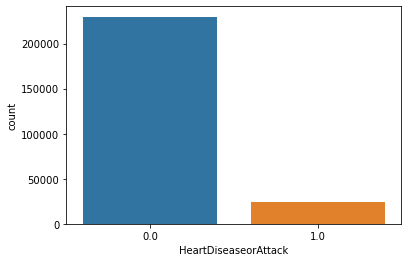

In [9]:
sns.countplot(x='HeartDiseaseorAttack', data=preprocessed_df)


**Logistic Regression using all features**

In [10]:
X = preprocessed_df.drop('HeartDiseaseorAttack', axis=1)
y = preprocessed_df['HeartDiseaseorAttack']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

logreg = LogisticRegression(max_iter=10000)
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('ROC AUC:', roc_auc)

Accuracy: 0.9084279407127089
Precision: 0.5536028119507909
Recall: 0.13213087248322147
ROC AUC: 0.5605398532273399


Accuracy measures the number of correct predictions made by the model compared to all predictions. However, the high accuracy score can be misleading in imbalanced datasets where one class is much more frequent than the others. This is the case in this dataset (229,787 no heart-disease, 23,893 heart-disease). If the model would always predict the majority class (no heart-disease) can have a high accuracy but still fail to capture the minority class (heart-disease).

Precision measures how well a model can predict positive examples. It is a useful metric when the cost of false positives is high.

The recall measures how well a model can identify positive examples. It is a useful metric when the cost of false negatives is high.

AUC is a metric suited for imbalanced datasets. AUC measures the overall performance of a binary classifier by computing the area under the ROC curve, which plots the true positive rate against the false positive rate for different classification thresholds. A high AUC score indicates that the classifier is able to distinguish between the positive and negative classes effectively, regardless of the class distribution. This makes the AUC an important mectric in this case. Measuring the AUC, the model is performing very badly. It has a AUC score of 0.5, which is the same as it would be randomly guessing.

**Logistic Regression using selected features**

In [13]:
X = selected_df.drop('HeartDiseaseorAttack', axis=1)
y = selected_df['HeartDiseaseorAttack']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

logreg = LogisticRegression(max_iter=10000)
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('ROC AUC:', roc_auc)

Accuracy: 0.9064524871270542
Precision: 0.4560975609756098
Recall: 0.049720818931135335
ROC AUC: 0.5218328217605607


**Altering the weight of the dataset**

In [14]:
# logistic regression with the class weight
logist_reg = LogisticRegressionCV(class_weight={0:1, 1:2}, cv=5, max_iter=10000, scoring='roc_auc')

# fit the model
logist_reg.fit(X, y)

# report the mean score on train and test set
print(f"Train AUC: {logist_reg.scores_[1].mean(axis=0).max()}")
print(f"Test AUC: {logist_reg.scores_[1].mean(axis=1).max()}")

Train AUC: 0.8079823490228254
Test AUC: 0.8091220133648788


In [15]:
# logistic regression with the class weight
logist_reg = LogisticRegressionCV(class_weight={0:1, 1:5}, cv=5, max_iter=10000, scoring='roc_auc')

# fit the model
logist_reg.fit(X, y)

# report the mean score on train and test set
print(f"Train AUC: {logist_reg.scores_[1].mean(axis=0).max()}")
print(f"Test AUC: {logist_reg.scores_[1].mean(axis=1).max()}")

Train AUC: 0.8079898075507843
Test AUC: 0.8092759839655589


In [16]:
# logistic regression with the class weight
logist_reg = LogisticRegressionCV(class_weight={0:1, 1:10}, cv=5, max_iter=10000, scoring='roc_auc')

# fit the model
logist_reg.fit(X, y)

# report the mean score on train and test set
print(f"Train AUC: {logist_reg.scores_[1].mean(axis=0).max()}")
print(f"Test AUC: {logist_reg.scores_[1].mean(axis=1).max()}")

Train AUC: 0.8079594179880474
Test AUC: 0.8092974777115721


**Logistic Regression using all features with new class weights**

In [17]:
X = preprocessed_df.drop('HeartDiseaseorAttack', axis=1)
y = preprocessed_df['HeartDiseaseorAttack']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

logreg = LogisticRegression(class_weight={0:1, 1:10}, max_iter=10000)
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('ROC AUC:', roc_auc)

Accuracy: 0.7487582781456954
Precision: 0.24532397063517394
Recall: 0.805998322147651
ROC AUC: 0.7744097075409331


**Logistic Regression using selected features with new class weights**

In [18]:
X = selected_df.drop('HeartDiseaseorAttack', axis=1)
y = selected_df['HeartDiseaseorAttack']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

logreg = LogisticRegression(max_iter=10000)
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('ROC AUC:', roc_auc)

Accuracy: 0.9064524871270542
Precision: 0.4560975609756098
Recall: 0.049720818931135335
ROC AUC: 0.5218328217605607


The ROC AUC is still very low, even after altering the weight. Therefore, we will continue building the model including all features. 